In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
labels = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoder = LabelEncoder()
for label in labels:
    df_encoded[label] = encoder.fit_transform(df_encoded[label])
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df_encoded.drop('HeartDisease',axis = 1)
y = df_encoded['HeartDisease']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [13]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,1,0,155,342,1,1,150,1,3.0,1
362,56,1,2,155,0,0,2,99,0,0.0,1
869,59,1,2,150,212,1,1,157,0,1.6,2
101,51,1,0,130,179,0,1,100,0,0.0,2
199,57,0,3,130,308,0,1,98,0,1.0,1


In [14]:
y_train.head()

155    1
362    1
869    0
101    0
199    0
Name: HeartDisease, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

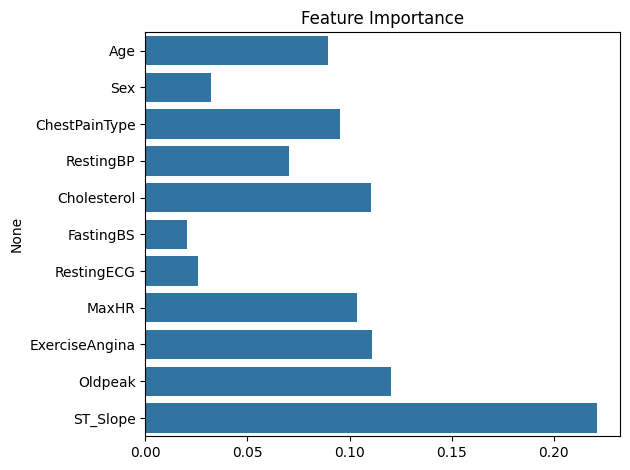

In [18]:
importance = model.feature_importances_
features = x.columns
sns.barplot(x = importance,y = features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [16]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

Accuracy Score: 0.8913043478260869
Confusion Matrix [[ 87  11]
 [ 14 118]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.87        98
           1       0.91      0.89      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

